# **Q1. Problem Statement: TimeSeries Analysis and Association Rules Mining**

Load  the 'Groceries_TS_And_ARM_dataset.csv'dataset  into  a DataFrame and perform the following Tasks:

1.Extract the year, month, and the day from the 'Date' column

2.Perform EDA on the DataFrame to observe the sales on each day of the week

3.Perform  EDA  on  the  DataFrame  to  observe  the  sales  in  each month  of  the year

4.Perform  EDA  on  the  DataFrame  to  observe  the  sales  on  each  day  of  the month

5.Aggregate  the  data  with  the  date  to  see  which  items  are  bought  on  which date, create a new DataFrame and store unique visitors and items

6.Plot the number of visitors visiting the store with respect to time and observe the trend in sales over the years using the Matplotlib library

7.Build  an  Apyori  model  to  draft  association  rules  among  all  the  product categories with parameters -min_support=0.00030, min_confidance=0.01, and min_lift=3

8.Sort the association pairs/rules with respect to the decreasing order of the lift

9.From the association rules, write down the necessary strategy to pair up the products to increase the sales

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning )
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Groceries_TS_And_ARM_dataset.csv')
df


,Member_number,Date,itemDescription
0,1808,21/07/2015,tropical fruit
1,2552,05/01/2015,whole milk
2,2300,19/09/2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,01/02/2015,whole milk
...,...,...,...
38760,4471,08/10/2014,sliced cheese
38761,2022,23/02/2014,candy
38762,1097,16/04/2014,cake bar
38763,1510,03/12/2014,fruit/vegetable juice



1.Extract the year, month, and the day from the 'Date' column

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df['DAY_of_Week']=df['Date'].dt.day_name()
df

<ipython-input-3-646dd37fbb0a>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])


,Member_number,Date,itemDescription,Year,month,day,DAY_of_Week
0,1808,2015-07-21,tropical fruit,2015,7,21,Tuesday
1,2552,2015-05-01,whole milk,2015,5,1,Friday
2,2300,2015-09-19,pip fruit,2015,9,19,Saturday
3,1187,2015-12-12,other vegetables,2015,12,12,Saturday
4,3037,2015-01-02,whole milk,2015,1,2,Friday
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,Sunday
38761,2022,2014-02-23,candy,2014,2,23,Sunday
38762,1097,2014-04-16,cake bar,2014,4,16,Wednesday
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,Wednesday


In [ ]:
df.shape

(38765, 7)


2.Perform EDA on the DataFrame to observe the sales on each day of the week


In [ ]:
len(df.groupby(['Member_number'])['DAY_of_Week'].count())

3898

In [ ]:
sale_day=pd.DataFrame(df.groupby(['DAY_of_Week'])['Member_number'].count().reset_index())
sale_day=sale_day.sort_values(by='Member_number',ascending=False)
sale_day.head()

,DAY_of_Week,Member_number
4,Thursday,5754
6,Wednesday,5663
3,Sunday,5624
5,Tuesday,5524
0,Friday,5504


<function matplotlib.pyplot.show(close=None, block=None)>

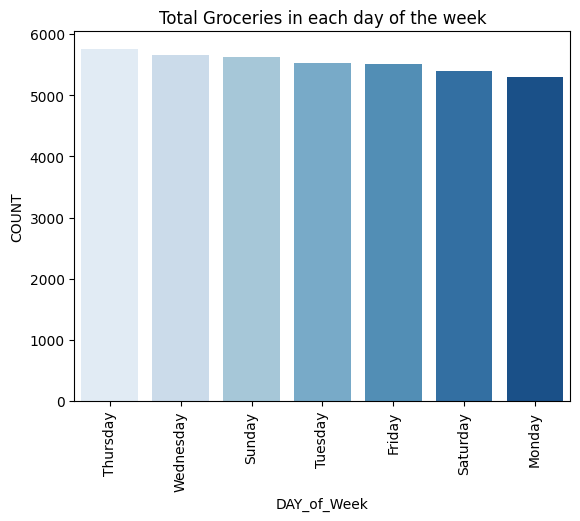

In [ ]:
sns.barplot(x='DAY_of_Week', y='Member_number', data=sale_day, palette='Blues')
plt.title('Total Groceries in each day of the week')
plt.ylabel('COUNT')
plt.xticks(rotation=90)
plt.show


3.Perform  EDA  on  the  DataFrame  to  observe  the  sales  in  each month  of  the year

In [ ]:
sale_month=pd.DataFrame(df.groupby(['month'])['Member_number'].count().reset_index())
sale_month=sale_month.sort_values(by='Member_number',ascending=False)
sale_month.head()

,month,Member_number
7,8,3498
4,5,3335
0,1,3333
5,6,3316
2,3,3283


Text(0.5, 1.0, 'Total Groceries sale in each Month')

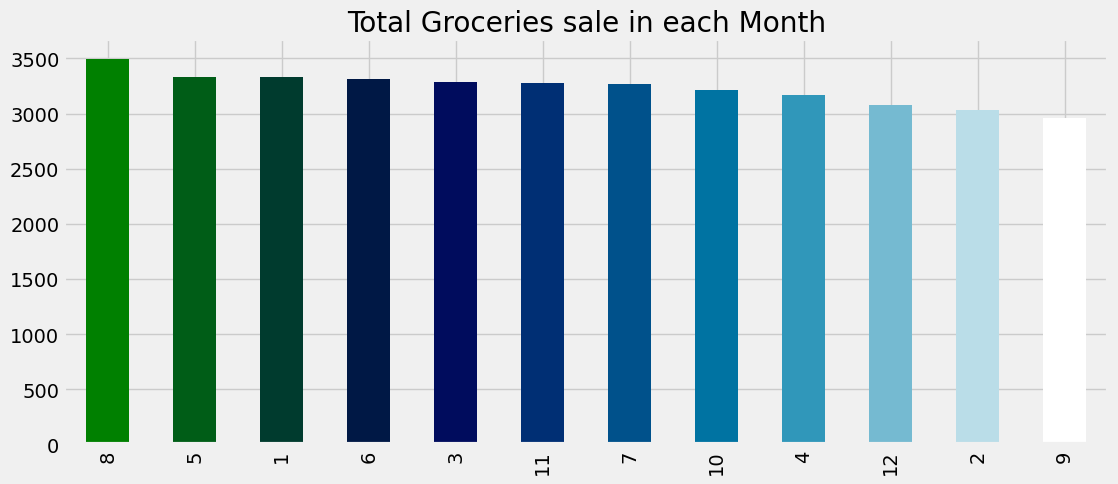

In [ ]:
plt.style.use('fivethirtyeight')
colors=plt.cm.ocean(np.linspace(0,1,12))
plt.rcParams['figure.figsize']=[12,5]
df['month'].value_counts().plot(kind='bar',color=colors)
plt.title('Total Groceries sale in each Month')



4.Perform  EDA  on  the  DataFrame  to  observe  the  sales  on  each  day  of  the month


In [ ]:
sale_month=pd.DataFrame(df.groupby(['day'])['Member_number'].count().reset_index())
sale_month=sale_month.sort_values(by='Member_number',ascending=False)
sale_month.head()

,day,Member_number
27,28,1375
20,21,1354
25,26,1351
7,8,1349
13,14,1341


Text(0.5, 1.0, 'Total Groceries sale in each Month')

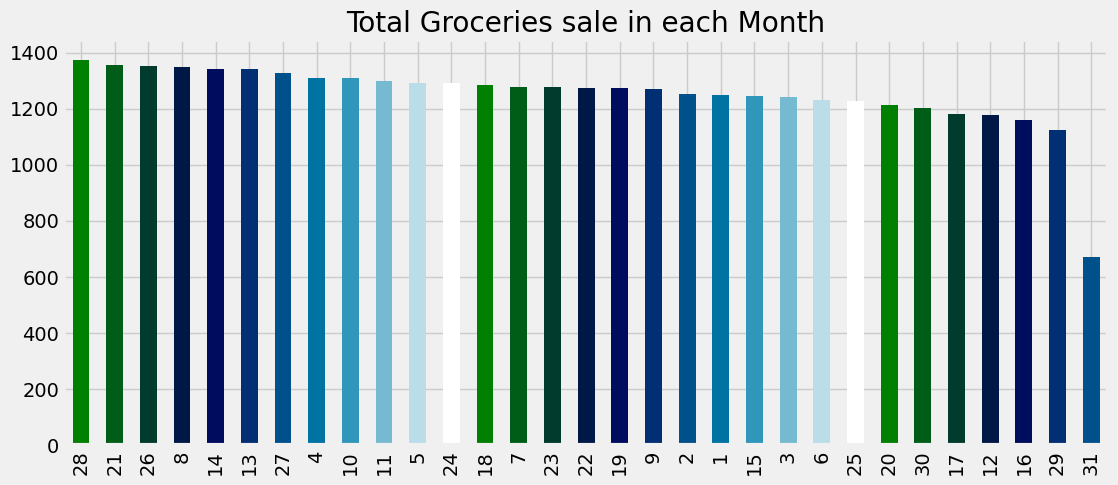

In [ ]:
plt.style.use('fivethirtyeight')
colors=plt.cm.ocean(np.linspace(0,1,12))
plt.rcParams['figure.figsize']=[12,5]
df['day'].value_counts().plot(kind='bar',color=colors)
plt.title('Total Groceries sale in each Month')



5.Aggregate  the  data  with  the  date  to  see  which  items  are  bought  on  which date, create a new DataFrame and store unique visitors and items


In [ ]:
df['item_count']=df['Date'].value_counts()
df

,Member_number,Date,itemDescription,Year,month,day,DAY_of_Week,item_count
0,1808,2015-07-21,tropical fruit,2015,7,21,Tuesday,NaN
1,2552,2015-05-01,whole milk,2015,5,1,Friday,NaN
2,2300,2015-09-19,pip fruit,2015,9,19,Saturday,NaN
3,1187,2015-12-12,other vegetables,2015,12,12,Saturday,NaN
4,3037,2015-01-02,whole milk,2015,1,2,Friday,NaN
...,...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,Sunday,NaN
38761,2022,2014-02-23,candy,2014,2,23,Sunday,NaN
38762,1097,2014-04-16,cake bar,2014,4,16,Wednesday,NaN
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,Wednesday,NaN


In [ ]:
agg_df = df.groupby('Date').agg({'Member_number' : 'nunique','itemDescription': ['nunique','unique']}).reset_index()
agg_df.columns=['Date','members_count','items_count','items']
agg_df.head()

,Date,members_count,items_count,items
0,2014-01-01,21,30,"[cleaner, sausage, tropical fruit, whole milk,..."
1,2014-01-02,29,45,"[other vegetables, pip fruit, frankfurter, sug..."
2,2014-01-03,24,36,"[sausage, meat, sugar, bottled beer, whole mil..."
3,2014-01-04,28,33,"[frankfurter, pastry, salty snack, bottled bee..."
4,2014-01-05,20,31,"[sausage, root vegetables, whipped/sour cream,..."



6.Plot the number of visitors visiting the store with respect to time and observe the trend in sales over the years using the Matplotlib library


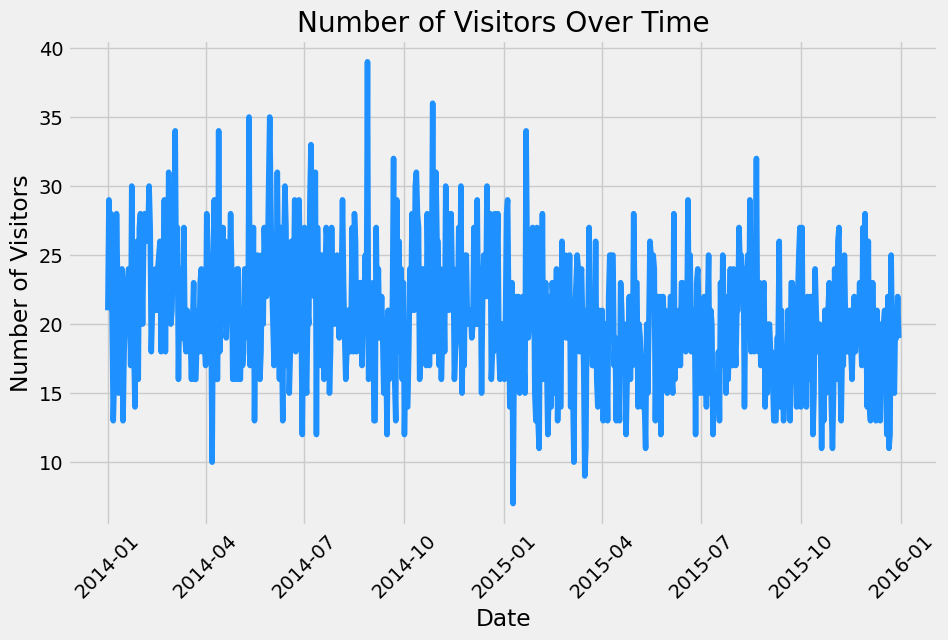

In [ ]:
visitor_count=df.groupby('Date')['Member_number'].nunique()
plt.figure(figsize=(10, 6))
plt.plot(visitor_count.index, visitor_count.values, color='#1E90FF')
plt.title('Number of Visitors Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


7.Build  an  Apyori  model  to  draft  association  rules  among  all  the  product categories with parameters -min_support=0.00030, min_confidance=0.01, and min_lift=3


In [ ]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=f7740d4bd672bcf7e058999941bd2744ecb8cdfe924ebe5ef6827c37888e3ab0
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from apyori import apriori

In [ ]:
trancations=agg_df['items'].tolist()


In [ ]:
rules = apriori(transactions = transactions, min_support=0.00030, min_confidance=0.01, min_lift=3, min_length=2, max_length=2)
#let's transform them into a list
results = list(rules)

def inspect(results):
    '''
    function to put the result in well organised pandas dataframe
    '''
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Item #1', 'Item #2', 'Support', 'Confidence', 'Lift'])
resultsinDataFrame.head()

,Item #1,Item #2,Support,Confidence,Lift
0,Instant food products,baby cosmetics,0.002747,0.035088,8.514620
1,Instant food products,bags,0.001374,0.017544,3.192982
2,Instant food products,liqueur,0.004121,0.052632,4.257310
3,abrasive cleaner,cleaner,0.005495,0.181818,4.564263
4,artif. sweetener,baby cosmetics,0.001374,0.035714,8.666667


In [ ]:
resultsinDataFrame.nlargest(n=10, columns='Lift')

,Item #1,Item #2,Support,Confidence,Lift
169,liqueur,preservation products,0.001374,0.111111,80.888889
160,kitchen utensil,prosecco,0.001374,1.000000,38.315789
157,kitchen utensil,male cosmetics,0.001374,1.000000,20.800000
203,preservation products,spices,0.001374,1.000000,18.666667
21,bags,frozen fruits,0.001374,0.250000,16.545455
201,preservation products,soups,0.001374,1.000000,15.826087
118,frozen chicken,organic products,0.001374,0.200000,14.560000
92,decalcifier,salad dressing,0.001374,0.111111,13.481481
113,frozen chicken,frozen fruits,0.001374,0.200000,13.236364
81,cream,frozen chicken,0.001374,0.083333,12.133333


Results:We can observe that in the store, people bought liquer with preservation products, kitchen utensil with prosecco and preservation products with spices. The store should add deals with preservation products, kitchen utensil and frozen chicken to increase it sales.